In [49]:
from phi.torch.flow import *

In [50]:
N = 128
DX = 2. / N
STEPS = 32
DT = 1. / STEPS
NU = 0.01 / (N * np.pi)

# initialization of velocities, cell centers of a CenteredGrid have DX/2 offsets for linspace()
INITIAL_NUMPY = np.asarray([-np.sin(np.pi * x) for x in np.linspace(-1 + DX / 2, 1 - DX / 2, N)])  # 1D numpy array

INITIAL = math.tensor(INITIAL_NUMPY, spatial('x'))  # convert to phiflow tensor

In [51]:
# velocity = CenteredGrid(INITIAL, extrapolation.PERIODIC, x=N, bounds=Box(x=(-1, 1)))
velocity = CenteredGrid(Noise(), extrapolation.PERIODIC, x=N, bounds=Box(x=(-1, 1)))  # random init

In [52]:
velocities = [velocity]
age = 0.
for i in range(STEPS):
    v1 = diffuse.explicit(velocities[-1], NU, DT)
    v2 = advect.semi_lagrangian(v1, v1, DT)
    age += DT
    velocities.append(v2)

print("New velocity content at t={}: {}".format(age, velocities[-1].values.numpy('x,vector')[0:5]))

New velocity content at t=1.0: [[-0.6997614 ]
 [-0.6872617 ]
 [-0.67474484]
 [-0.66221154]
 [-0.6496629 ]]


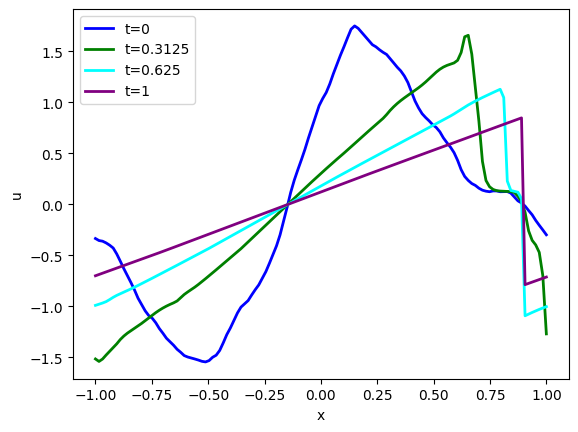

In [53]:
# get "velocity.values" from each phiflow state with a channel dimensions, i.e. "vector"
vels = [v.values.numpy('x,vector') for v in velocities]  # gives a list of 2D arrays 

import pylab

fig = pylab.figure().gca()
fig.plot(np.linspace(-1, 1, len(vels[0].flatten())), vels[0].flatten(), lw=2, color='blue', label="t=0")
fig.plot(np.linspace(-1, 1, len(vels[10].flatten())), vels[10].flatten(), lw=2, color='green', label="t=0.3125")
fig.plot(np.linspace(-1, 1, len(vels[20].flatten())), vels[20].flatten(), lw=2, color='cyan', label="t=0.625")
fig.plot(np.linspace(-1, 1, len(vels[32].flatten())), vels[32].flatten(), lw=2, color='purple', label="t=1")
pylab.xlabel('x');
pylab.ylabel('u');
pylab.legend()

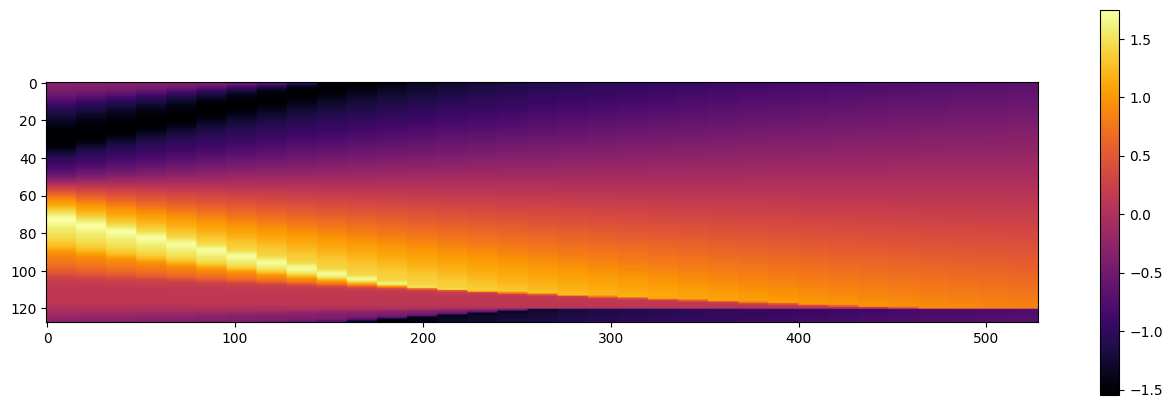

In [54]:
import pylab

vels = [x.values.numpy('x,vector') for x in velocities]

vels = np.concatenate(vels, axis=-1)
vels = np.expand_dims(vels, axis=2)
for i in range(4):
    vels = np.concatenate([vels, vels], axis=2)
vels = np.reshape(vels, [vels.shape[0], vels.shape[1] * vels.shape[2]])
fig, axes = pylab.subplots(1, 1, figsize=(16, 5))
im = axes.imshow(vels, origin='upper', cmap='inferno')
pylab.colorbar(im)